In [33]:
## 모듈 로딩

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import koreanize_matplotlib

In [34]:
columns = [
    "BRTC_NM",                   # 광역시/도명 (예: 서울특별시, 대구광역시)
    "SIGNGU_NM",                 # 시/군/구명 (예: 강남구, 수성구)
    "DE",                        # 날짜 (Date)                            ***
    "HRLY_TIME",                 # 시간대 (Hour, 0~23시)                

    "PRCPT_TY_NM",               # 강수 형태 (비, 눈, 없음 등)              ***
    "HD_VALUE",                  # 습도 (%) 
    "PRCPT_QY_VALUE",            # 강수량 (mm)                            ***
    "TMPRT_VALUE",               # 기온 (℃)                              ***
    "WS_VALUE",                  # 풍속 (m/s)
    "WIND_IN_TY_NM",             # 풍향 이름 (예: 남풍, 북동풍 등)
    "EAST_WST_WIND_TY_NM",       # 동/서풍 구분
    "WD_VALUE",                  # 풍향 각도 (0~360°)
    "WD_CTGRY_NM",               # 풍향 범주 (북풍, 남서풍 등 분류)

##                              ************************************************
    "KORFD_DLVR_CASCNT",         # 한식 배달 주문건수
    "SNACKFD_DLVR_CASCNT",       # 분식 배달 주문건수
    "CAFE-DSERT_DLVR_CASCNT",    # 카페·디저트 배달 주문건수
    "PKCUT-JPFD_DLVR_CASCNT",    # 돈까스·일식 배달 주문건수
    "SLICEFISH_DLVR_CASCNT",     # 회(생선회) 배달 주문건수
    "CHICKEN_DLVR_CASCNT",       # 치킨 배달 주문건수
    "PIZZA_DLVR_CASCNT",         # 피자 배달 주문건수
    "ASI-WESFD_DLVR_CASCNT",     # 아시안·양식 배달 주문건수
    "CHINESSFD_DLVR_CASCNT",     # 중식 배달 주문건수
    "JOKB-BOSAM_ORDER_CASCNT",   # 족발·보쌈 배달 주문건수
    "MIDNIFD_DLVR_CASCNT",       # 야식 배달 주문건수
    "STEAM-SOUP_DLVR_CASCNT",    # 찜·탕 배달 주문건수
    "LUNCHBOX_DLVR_CASCNT",      # 도시락 배달 주문건수
    "FASTFD_DLVR_CASCNT"         # 패스트푸드 배달 주문건수
]
# header=None 으로 읽어오기
origin1 = pd.read_csv('./Data/KGU_3rd_ORIGIN_KGUWTHRDLVRDF_20190701000000.csv', header=None)
origin2 = pd.read_csv('./Data/KGU_3rd_ORIGIN_KGUWTHRDLVRDF_20200101000000.csv', header=None)
origin3 = pd.read_csv('./Data/KGU_3rd_ORIGIN_KGUWTHRDLVRDF_20200701000000.csv', header=None)

# 세 파일 합치기
origin = pd.concat([origin1, origin2, origin3], ignore_index=True)

# 컬럼명 지정
origin.columns = columns

# 확인
print(origin.shape)
origin.head()

(380741, 27)


,BRTC_NM,SIGNGU_NM,DE,HRLY_TIME,PRCPT_TY_NM,HD_VALUE,PRCPT_QY_VALUE,TMPRT_VALUE,WS_VALUE,WIND_IN_TY_NM,...,SLICEFISH_DLVR_CASCNT,CHICKEN_DLVR_CASCNT,PIZZA_DLVR_CASCNT,ASI-WESFD_DLVR_CASCNT,CHINESSFD_DLVR_CASCNT,JOKB-BOSAM_ORDER_CASCNT,MIDNIFD_DLVR_CASCNT,STEAM-SOUP_DLVR_CASCNT,LUNCHBOX_DLVR_CASCNT,FASTFD_DLVR_CASCNT
0,강원도,강릉시,2019-08-02,19,없음,83.0,0.0,25.4,0.3,약,...,0,0,0,0,0,0,0,0,0,0
1,강원도,강릉시,2019-08-03,15,없음,83.0,0.0,25.7,0.6,약,...,0,0,0,0,0,0,0,0,0,0
2,강원도,강릉시,2019-08-03,16,없음,83.0,0.0,25.4,0.2,약,...,0,0,0,0,0,0,0,0,0,0
3,강원도,강릉시,2019-08-04,11,없음,86.0,0.0,27.3,1.2,약,...,0,0,0,0,0,0,0,0,0,0
4,강원도,강릉시,2019-08-04,14,없음,89.0,0.0,26.2,1.1,약,...,0,0,0,0,0,0,0,0,0,0


In [35]:
## 결측치 확인
origin.info() ## 결측치 없음

## 이상치 확인 ==> 없음
for col in origin.columns :
    print(f'[{col}] ----------- {origin[col].nunique()}개')
    print(f'{origin[col].unique()}')
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380741 entries, 0 to 380740
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   BRTC_NM                  380741 non-null  object 
 1   SIGNGU_NM                380741 non-null  object 
 2   DE                       380741 non-null  object 
 3   HRLY_TIME                380741 non-null  int64  
 4   PRCPT_TY_NM              380741 non-null  object 
 5   HD_VALUE                 380741 non-null  float64
 6   PRCPT_QY_VALUE           380741 non-null  float64
 7   TMPRT_VALUE              380741 non-null  float64
 8   WS_VALUE                 380741 non-null  float64
 9   WIND_IN_TY_NM            380741 non-null  object 
 10  EAST_WST_WIND_TY_NM      380741 non-null  object 
 11  WD_VALUE                 380741 non-null  int64  
 12  WD_CTGRY_NM              380741 non-null  object 
 13  KORFD_DLVR_CASCNT        380741 non-null  int64  
 14  SNAC

In [36]:

## 사용할 컬럼만 뽑아오기
use_cols = ['PRCPT_TY_NM', 'DE', 'PRCPT_QY_VALUE', 'TMPRT_VALUE',
            ##   강수타입        날짜   강수량             온도
            "BRTC_NM",                   # 광역시/도명 (예: 서울특별시, 대구광역시)
            "SIGNGU_NM",                 # 시/군/구명 (예: 강남구, 수성구)
            "KORFD_DLVR_CASCNT",         # 한식 배달 주문건수
            "SNACKFD_DLVR_CASCNT",       # 분식 배달 주문건수
            "CAFE-DSERT_DLVR_CASCNT",    # 카페·디저트 배달 주문건수
            "PKCUT-JPFD_DLVR_CASCNT",    # 돈까스·일식 배달 주문건수
            "SLICEFISH_DLVR_CASCNT",     # 회(생선회) 배달 주문건수
            "CHICKEN_DLVR_CASCNT",       # 치킨 배달 주문건수
            "PIZZA_DLVR_CASCNT",         # 피자 배달 주문건수
            "ASI-WESFD_DLVR_CASCNT",     # 아시안·양식 배달 주문건수
            "CHINESSFD_DLVR_CASCNT",     # 중식 배달 주문건수
            "JOKB-BOSAM_ORDER_CASCNT",   # 족발·보쌈 배달 주문건수
            "MIDNIFD_DLVR_CASCNT",       # 야식 배달 주문건수
            "STEAM-SOUP_DLVR_CASCNT",    # 찜·탕 배달 주문건수
            "LUNCHBOX_DLVR_CASCNT",      # 도시락 배달 주문건수
            "FASTFD_DLVR_CASCNT"         # 패스트푸드 배달 주문건수
            ]
dataDF = origin[use_cols]
dataDF.head()

,PRCPT_TY_NM,DE,PRCPT_QY_VALUE,TMPRT_VALUE,BRTC_NM,SIGNGU_NM,KORFD_DLVR_CASCNT,SNACKFD_DLVR_CASCNT,CAFE-DSERT_DLVR_CASCNT,PKCUT-JPFD_DLVR_CASCNT,SLICEFISH_DLVR_CASCNT,CHICKEN_DLVR_CASCNT,PIZZA_DLVR_CASCNT,ASI-WESFD_DLVR_CASCNT,CHINESSFD_DLVR_CASCNT,JOKB-BOSAM_ORDER_CASCNT,MIDNIFD_DLVR_CASCNT,STEAM-SOUP_DLVR_CASCNT,LUNCHBOX_DLVR_CASCNT,FASTFD_DLVR_CASCNT
0,없음,2019-08-02,0.0,25.4,강원도,강릉시,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,없음,2019-08-03,0.0,25.7,강원도,강릉시,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,없음,2019-08-03,0.0,25.4,강원도,강릉시,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,없음,2019-08-04,0.0,27.3,강원도,강릉시,0,0,2,0,0,0,0,0,0,0,0,0,0,0
4,없음,2019-08-04,0.0,26.2,강원도,강릉시,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [37]:

# 컬럼명 한글로 변경
dataDF = dataDF.rename(columns={
    "PRCPT_TY_NM": "강수형태",
    "DE": "날짜",
    "PRCPT_QY_VALUE": "강수량(mm)",
    "TMPRT_VALUE": "기온(℃)",
    
    "BRTC_NM" : '광역시/도명',                   # 광역시/도명 (예: 서울특별시, 대구광역시)
    "SIGNGU_NM" : '시/군/구명',                 # 시/군/구명 (예: 강남구, 수성구)
    
    "KORFD_DLVR_CASCNT": "한식",
    "SNACKFD_DLVR_CASCNT": "분식",
    "CAFE-DSERT_DLVR_CASCNT": "카페·디저트",
    "PKCUT-JPFD_DLVR_CASCNT": "돈까스·일식",
    "SLICEFISH_DLVR_CASCNT": "회",
    "CHICKEN_DLVR_CASCNT": "치킨",
    "PIZZA_DLVR_CASCNT": "피자",
    "ASI-WESFD_DLVR_CASCNT": "아시안·양식",
    "CHINESSFD_DLVR_CASCNT": "중식",
    "JOKB-BOSAM_ORDER_CASCNT": "족발·보쌈",
    "MIDNIFD_DLVR_CASCNT": "야식",
    "STEAM-SOUP_DLVR_CASCNT": "찜·탕",
    "LUNCHBOX_DLVR_CASCNT": "도시락",
    "FASTFD_DLVR_CASCNT": "패스트푸드"
})

# 변경 결과 확인
print(dataDF.columns)


Index(['강수형태', '날짜', '강수량(mm)', '기온(℃)', '광역시/도명', '시/군/구명', '한식', '분식',
       '카페·디저트', '돈까스·일식', '회', '치킨', '피자', '아시안·양식', '중식', '족발·보쌈', '야식',
       '찜·탕', '도시락', '패스트푸드'],
      dtype='object')


In [38]:
## 데이터 전처리
# 날짜 컬럼 datetime 형식으로 변환
dataDF['날짜'] = pd.to_datetime(dataDF['날짜'])

# 계절 구분 함수
def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

# 계절 컬럼 추가
dataDF['계절'] = dataDF['날짜'].dt.month.apply(get_season)
# dataDF['계절'].unique()

# 배달 관련 컬럼만 리스트로 추출
delivery_cols = dataDF.columns[4:]
print(delivery_cols)


Index(['광역시/도명', '시/군/구명', '한식', '분식', '카페·디저트', '돈까스·일식', '회', '치킨', '피자',
       '아시안·양식', '중식', '족발·보쌈', '야식', '찜·탕', '도시락', '패스트푸드', '계절'],
      dtype='object')


계절,가을,겨울,봄,여름
한식,283283,329413,388567,433397
분식,297653,327335,366302,356108
카페·디저트,199618,214258,280198,279364
돈까스·일식,97462,125645,146754,137146
회,42039,49330,62489,54275
치킨,522891,618290,667478,714153
피자,113614,150364,144268,135958
아시안·양식,59299,67385,67263,65905
중식,64004,86166,105170,94276
족발·보쌈,218329,257788,318942,322751


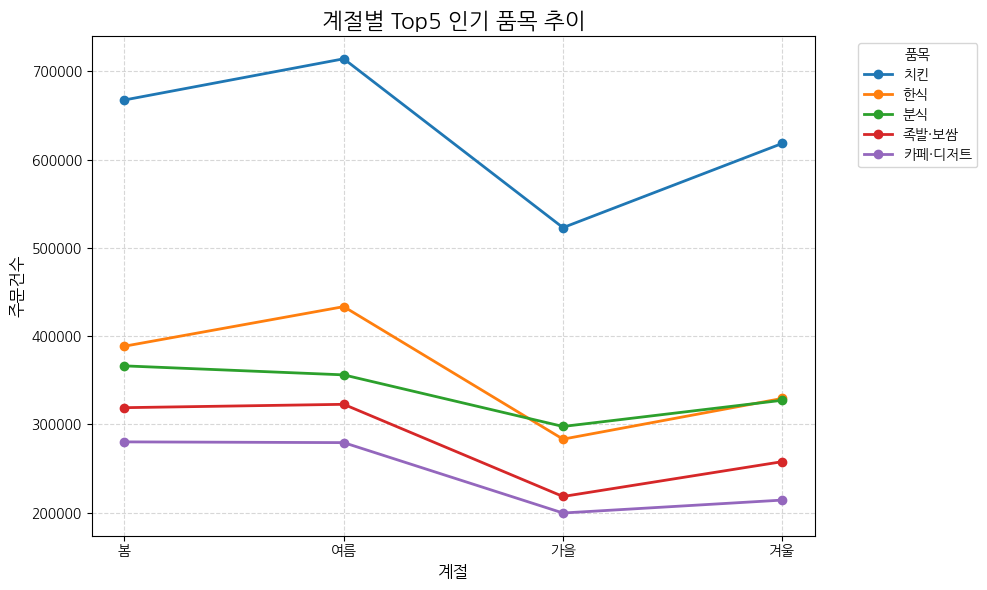

계절
봄     3040388
여름    3082931
가을    2251093
겨울    2657744
dtype: int64


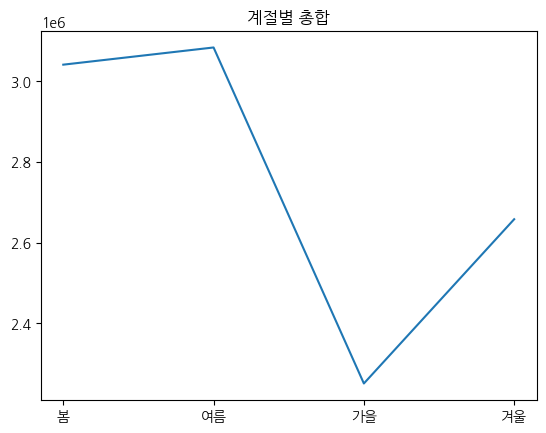

In [39]:
## depth1 : 우리나라의 특징인 4개절 별 가장 많이 팔린 품목 top5
# 계절별로 합계 계산
season_sum = dataDF.groupby('계절')[delivery_cols].sum(numeric_only=True).T  # 행: 품목 / 열: 계절
display(season_sum)

# 계절 순서 고정
season_order = ['봄', '여름', '가을', '겨울']
season_sum = season_sum[season_order]

# ------------------------------------------------
# 계절 전체에서 Top5 품목 추출
# (즉, 모든 계절 합계 기준으로 상위 5개 품목)
# ------------------------------------------------

total_sum = season_sum.sum(axis=1)
top5_items = total_sum.sort_values(ascending=False).head(5).index
top5_data = season_sum.loc[top5_items]

# ------------------------------------------------
#  꺾은선 그래프 시각화
# ------------------------------------------------
plt.figure(figsize=(10, 6))
for item in top5_data.index:
    plt.plot(season_order, top5_data.loc[item], marker='o', linewidth=2, label=item)
plt.title("계절별 Top5 인기 품목 추이", fontsize=16)
plt.xlabel("계절", fontsize=12)
plt.ylabel("주문건수", fontsize=12)
plt.legend(title="품목", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

s_sum = season_sum.sum(axis=0)
print(s_sum)
plt.plot(s_sum.index,s_sum.values)
plt.title('계절별 총합')
plt.show()

In [40]:
# ------------------------------------------------
# 1️⃣ 계절 구분
# ------------------------------------------------
dataDF['계절'] = dataDF['날짜'].dt.month.apply(get_season)

# ------------------------------------------------
# 2️⃣ 강수형태·기온·강수량 처리
# ------------------------------------------------
# (1) 강수형태별 비율 계산 (‘비’가 나타난 비율)
rain_ratio = (
    dataDF.groupby('계절')['강수형태']
    .apply(lambda x: (x == '비').sum() / len(x) * 100)
    .rename('강수일 비율(%)')
)

# (2) 비 오는 날만 필터링하여 평균 강수량 계산
rain_only = dataDF[dataDF['강수형태'] == '비']
rain_mean = (
    rain_only.groupby('계절')['강수량(mm)']
    .mean()
    .rename('평균 강수량(mm)')
)

# (3) 전체 기온 평균 (모든 날 기준)
temp_mean = (
    dataDF.groupby('계절')['기온(℃)']
    .mean()
    .rename('평균 기온(℃)')
)

# (4) 결합
season_weather = pd.concat([temp_mean, rain_mean, rain_ratio], axis=1)

# 계절 순서 맞추기
season_order = ['봄', '여름', '가을', '겨울']
season_weather = season_weather.reindex(season_order)

display(season_weather.round(2))


,평균 기온(℃),평균 강수량(mm),강수일 비율(%)
계절,,,
봄,10.47,1.33,3.86
여름,23.04,3.35,9.16
가을,13.67,2.41,5.89
겨울,1.22,1.11,5.40


Index(['강수형태', '날짜', '강수량(mm)', '기온(℃)', '광역시/도명', '시/군/구명', '한식', '분식',
       '카페·디저트', '돈까스·일식', '회', '치킨', '피자', '아시안·양식', '중식', '족발·보쌈', '야식',
       '찜·탕', '도시락', '패스트푸드', '계절', '총배달량'],
      dtype='object')
눈 올때 TOP5


치킨        4111
족발·보쌈     1906
분식        1888
한식        1857
카페·디저트    1852
Name: 눈, dtype: int64


비 올때 TOP5


치킨        161432
한식         92404
분식         83313
족발·보쌈      69877
카페·디저트     57438
Name: 비, dtype: int64


없음 올때 TOP5


치킨        2353964
한식        1338521
분식        1260806
족발·보쌈     1044392
카페·디저트     912979
Name: 없음, dtype: int64


진눈개비 올때 TOP5


치킨        3305
한식        1878
족발·보쌈     1635
분식        1391
카페·디저트    1169
Name: 진눈개비, dtype: int64


 ----------------------------------------- 
🌧 비 (강수량 15mm 이상) TOP5 지역/시간


치킨        2792
한식        1458
분식        1248
족발·보쌈      951
카페·디저트     798
Name: 비, dtype: int64


🌧 없음 (강수량 15mm 이상) TOP5 지역/시간


치킨        62
족발·보쌈     24
카페·디저트    23
한식        23
피자        23
Name: 없음, dtype: int64

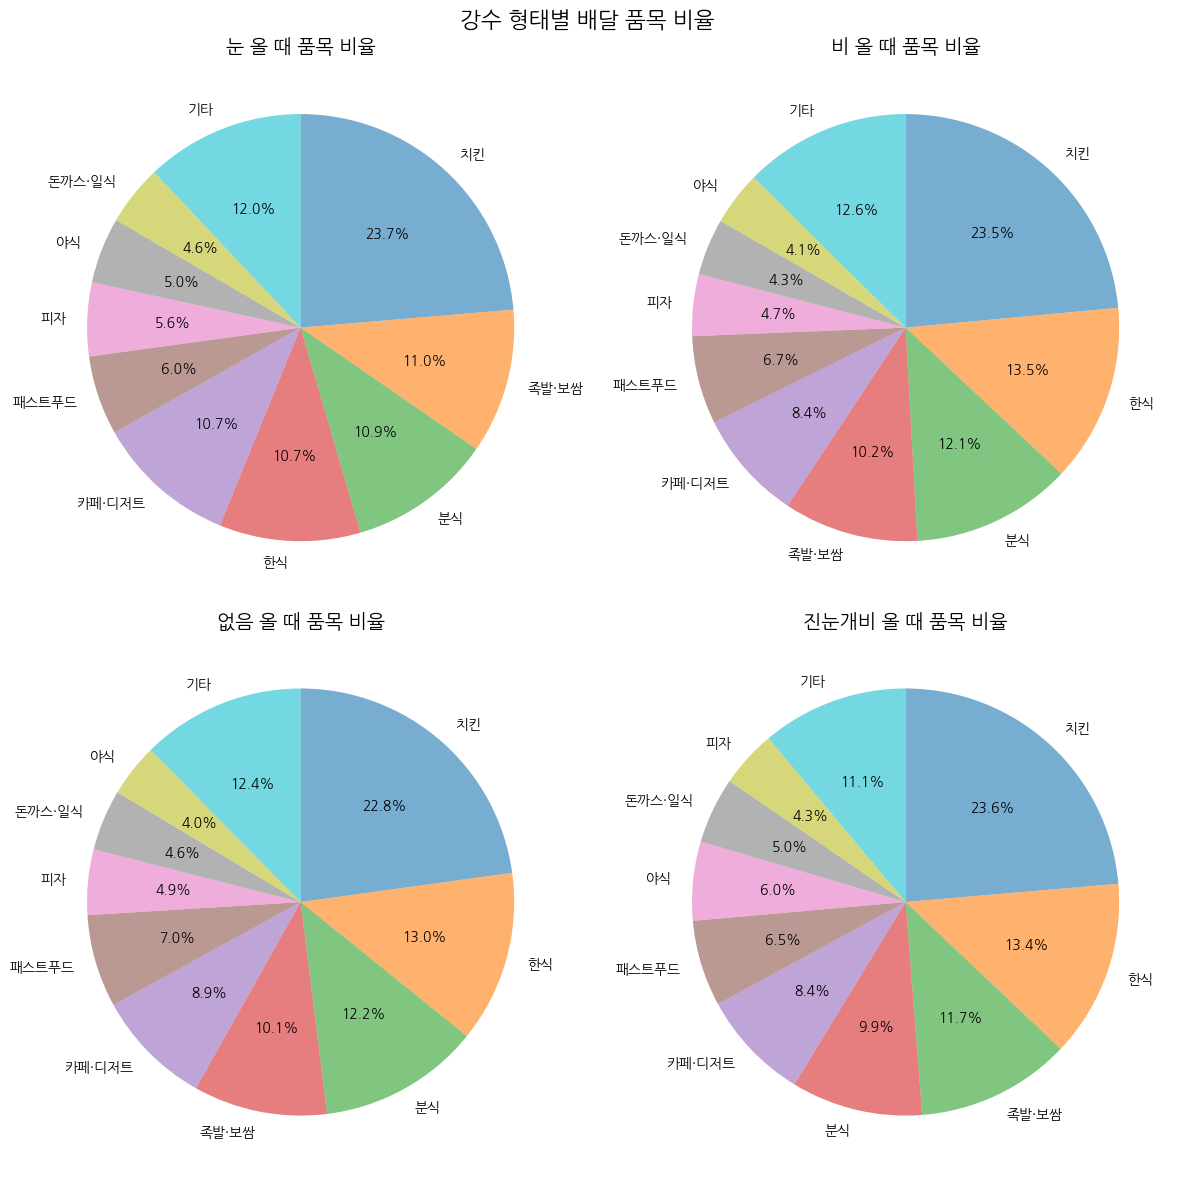

In [ ]:
## depth3 : 강수 타입별로 배달 품목 비교
## 강수타입 : 비, 눈, 진눈깨비, 없음

## 1. 그럼 비가 올때는 다른 걸 시켜 먹을까? ==> 별 차이 없음
print(dataDF.columns)
prcpt = dataDF.groupby(by='강수형태')[delivery_cols].sum(numeric_only=True).T
prcpt

for col in prcpt.columns :
    print(f"{col} 올때 TOP5")
    display(prcpt[col].sort_values(ascending=False).head())
    print()
print(" ----------------------------------------- ")

# 강수량 15mm 이상인 데이터만 필터링 ===> 별차이 없음

rain5 = dataDF[dataDF['강수량(mm)'] >= 15].groupby(by='강수형태')[delivery_cols].sum(numeric_only=True).T

# 각 품목별 Top5 출력
for col in rain5.columns:
    if col not in ['강수형태', '날짜', '강수량(mm)', '기온(℃)']:  # 비배달 컬럼 제외 (선택사항)
        print(f"🌧 {col} (강수량 15mm 이상) TOP5 지역/시간")
        display(rain5[col].sort_values(ascending=False).head())
        print()
        
        
plt.figure(figsize=(12, 12))
plt.suptitle("강수 형태별 배달 품목 비율", fontsize=16)

# 파스텔톤 색상 리스트 생성
pastel_colors = list(mcolors.TABLEAU_COLORS.values())  # 기본 컬러보다 연함
pastel_colors = [mcolors.to_rgba(c, alpha=0.6) for c in pastel_colors]  # 투명도 조정 (α=0.6)

# 강수 형태 목록
prcpts = prcpt.columns

# 강수형태별 파이차트 반복 생성
for i, p in enumerate(prcpts, 1):
    data = prcpt[p].sort_values(ascending=False)
    top5 = data.head(9)
    others = data.iloc[9:].sum()
    pie_data = pd.concat([top5, pd.Series({'기타': others})])

    # subplot (2행 2열)
    plt.subplot(2, 2, i)
    plt.pie(
        pie_data,
        labels=pie_data.index,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        colors=pastel_colors,  # ✅ 파스텔톤 적용
    )
    plt.title(f"{p} 올 때 품목 비율", fontsize=14)

plt.tight_layout()
plt.show()



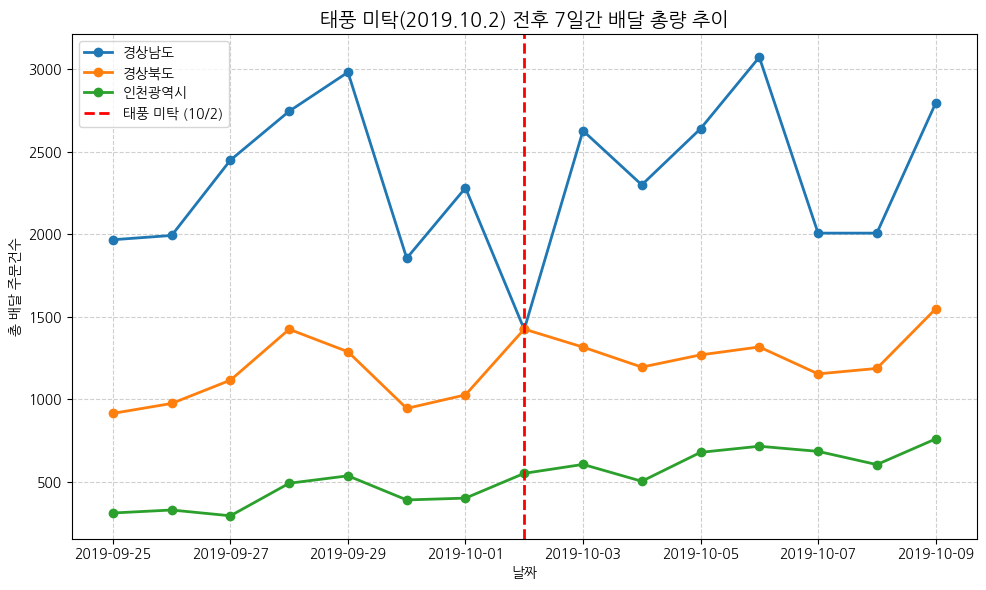

In [ ]:
## depth 4 : 자연재해 당시 총 배달량은 어떻게 달라질까?
## 2019년 10월 2~3일경 태풍 '미탁'으로 인해  피해를 본것으로 알고 있음
## 미탁으로 인한 피해지역의 10월2일 전후의 매출량 비교를 위해 전후 일주일 총 배달량 비교
idx = dataDF['강수량(mm)'].sort_values(ascending=False).head().index
(dataDF.loc[idx])

dataDF['날짜'] = pd.to_datetime(dataDF['날짜'])

# -------------------------------------------------
# 2️⃣ 총 배달량 계산
# -------------------------------------------------
delivery_cols = [
    "한식","분식","카페·디저트","돈까스·일식","회","치킨","피자",
    "아시안·양식","중식","족발·보쌈","야식","찜·탕","도시락","패스트푸드"
]
dataDF['총배달량'] = dataDF[delivery_cols].sum(axis=1)

# -------------------------------------------------
# 2️⃣ 분석 구간 설정 (전후 7일)
# -------------------------------------------------
target_date = pd.to_datetime('2019-10-02')
start_date = target_date - pd.Timedelta(days=7)
end_date   = target_date + pd.Timedelta(days=7)

# 필터링
compareDF = dataDF[(dataDF['날짜'] >= start_date) & (dataDF['날짜'] <= end_date)]

# -------------------------------------------------
# 3️⃣ 지역별 일자별 총배달량 집계
# -------------------------------------------------
regions = ['경상남도', '경상북도','인천광역시']

region_daily = (
    compareDF[compareDF['광역시/도명'].isin(regions)]
    .groupby(['광역시/도명', '날짜'])['총배달량']
    .sum()
    .reset_index()
)

# -------------------------------------------------
# 4️⃣ 시각화 (꺾은선 그래프)
# -------------------------------------------------
plt.figure(figsize=(10,6))

for region in regions:
    subset = region_daily[region_daily['광역시/도명'] == region]
    plt.plot(subset['날짜'], subset['총배달량'], marker='o', linewidth=2, label=region)

# 기준선 (태풍 발생일)
plt.axvline(pd.to_datetime('2019-10-02'), color='red', linestyle='--', linewidth=2, label='태풍 미탁 (10/2)')

plt.title("태풍 미탁(2019.10.2) 전후 7일간 배달 총량 추이", fontsize=14)
plt.xlabel("날짜")
plt.ylabel("총 배달 주문건수")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()